In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Thiết lập style cho plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("done")

done


In [64]:

# Load dataset
file_path = r"C:\Users\hoang\PycharmProjects\Final_DataScience\dataset\StudentsPerformance.csv"
data = pd.read_csv(file_path)

print("Check dataset:")
print(f"Shape: {data.shape}")
print("\nColumns:", data.columns.tolist())
data.head()

Check dataset:
Shape: (1000, 8)

Columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [65]:

print("Mô tả:")
print(data.describe())

print("\nCheck missing values:")
print(data.isnull().sum())

print("\n Các giá trị duy nhất của từng cột:")
categorical_cols = [ 'gender', 'race/ethnicity', 'parental level of education',
                     'lunch', 'test preparation course' ]
for col in categorical_cols:
    print(f"{col}: {data [ col ].unique()}")


Mô tả:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Check missing values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

 Các giá trị duy nhất của từng cột:
gender: ['female' 'male']
race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high 

In [66]:
#Chuyen cot thong tin thanh so nguyen de train
data_encoded = data.copy()

le_dict = {} #tạo dict lưu label
# Encode các cột tt
categorical_columns = [ 'gender', 'race/ethnicity', 'parental level of education',
                        'lunch', 'test preparation course' ]
for col in categorical_columns:
    le = LabelEncoder()
    data_encoded [ col ] = le.fit_transform(data [ col ])
    le_dict [ col ] = le
    print(f"Encoded {col}")
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"       Mapping: {mapping}") #hien thi map

print("\n Dữ liệu sau khi encode:")
data_encoded.head()

Encoded gender
       Mapping: {'female': np.int64(0), 'male': np.int64(1)}
Encoded race/ethnicity
       Mapping: {'group A': np.int64(0), 'group B': np.int64(1), 'group C': np.int64(2), 'group D': np.int64(3), 'group E': np.int64(4)}
Encoded parental level of education
       Mapping: {"associate's degree": np.int64(0), "bachelor's degree": np.int64(1), 'high school': np.int64(2), "master's degree": np.int64(3), 'some college': np.int64(4), 'some high school': np.int64(5)}
Encoded lunch
       Mapping: {'free/reduced': np.int64(0), 'standard': np.int64(1)}
Encoded test preparation course
       Mapping: {'completed': np.int64(0), 'none': np.int64(1)}

 Dữ liệu sau khi encode:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [67]:
print("Chia dữ liệu")
# Features: các biến categorical đã encode
feature_columns = ['gender', 'race/ethnicity', 'parental level of education',
                   'lunch', 'test preparation course']
X = data_encoded[feature_columns]

# Targets: 3 cột điểm, gộp lại thành DataFrame
y_all = data_encoded[['math score', 'reading score', 'writing score']]

print(f"Features shape: {X.shape}")
print(f"Targets shape: {y_all.shape}")

# Chia train/test một lần duy nhất để đảm bảo đồng bộ
X_train, X_test, y_train, y_test = train_test_split(
    X, y_all, test_size=0.2, random_state=42)

# Tách riêng từng target sau khi chia
y_math_train = y_train['math score']
y_math_test = y_test['math score']

y_reading_train = y_train['reading score']
y_reading_test = y_test['reading score']

y_writing_train = y_train['writing score']
y_writing_test = y_test['writing score']

print(f"Train set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")


Chia dữ liệu
Features shape: (1000, 5)
Targets shape: (1000, 3)
Train set: 800 samples
Test set: 200 samples


In [68]:
# Khởi tạo các mô hình Random Forest
rf_math = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reading = RandomForestRegressor(n_estimators=100, random_state=42)
rf_writing = RandomForestRegressor(n_estimators=100, random_state=42)

# Training
rf_math.fit(X_train, y_math_train)
rf_reading.fit(X_train, y_reading_train)
rf_writing.fit(X_train, y_writing_train)

print("done train")

# Dự báo
rf_math_pred = rf_math.predict(X_test)
rf_reading_pred = rf_reading.predict(X_test)
rf_writing_pred = rf_writing.predict(X_test)

print("done tạo pred")

##%%

done train
done tạo pred


In [69]:
# tạo hàm đgia
def evaluate_model(y_true, y_pred, model_name, subject):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} - {subject}:")
    print(f"   RMSE: {rmse:.2f}")
    print(f"   MAE: {mae:.2f}")
    print(f"   R²: {r2:.3f}")
    print("-" * 40)

    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}

rf_math_metrics = evaluate_model(y_math_test, rf_math_pred, "Random Forest", "Math")
rf_reading_metrics = evaluate_model(y_reading_test, rf_reading_pred, "Random Forest", "Reading")
rf_writing_metrics = evaluate_model(y_writing_test, rf_writing_pred, "Random Forest", "Writing")

Random Forest - Math:
   RMSE: 15.71
   MAE: 12.37
   R²: -0.014
----------------------------------------
Random Forest - Reading:
   RMSE: 15.29
   MAE: 11.92
   R²: -0.034
----------------------------------------
Random Forest - Writing:
   RMSE: 14.85
   MAE: 11.37
   R²: 0.086
----------------------------------------


In [70]:
test_indices = X_test.index
results_df = data.iloc [ test_indices ].copy()

# thêm 3 cột dự đoán
results_df [ 'math_pred_rf' ] = rf_math_pred
results_df [ 'reading_pred_rf' ] = rf_reading_pred
results_df [ 'writing_pred_rf' ] = rf_writing_pred

print("results:")
results_df.head(10)

results:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_pred_rf,reading_pred_rf,writing_pred_rf
521,female,group C,associate's degree,standard,none,91,86,84,62.521898,70.123343,69.265613
737,female,group B,some college,free/reduced,completed,53,66,73,63.504167,75.859417,71.774095
740,male,group D,bachelor's degree,standard,none,80,73,72,65.418079,61.012050,60.170500
660,male,group C,some college,free/reduced,none,74,77,73,62.699020,56.734647,52.057435
411,male,group E,some college,standard,completed,84,83,78,87.953131,78.317552,73.061429
678,male,group D,associate's degree,free/reduced,none,81,75,78,61.668940,59.975119,58.858179
626,male,group B,associate's degree,free/reduced,completed,69,70,63,69.447071,67.955500,63.984167
513,female,group B,some high school,standard,completed,54,61,62,52.612667,67.429500,63.843333
859,male,group C,associate's degree,free/reduced,none,87,73,72,61.632320,61.358445,57.640052
136,male,group B,some high school,standard,completed,51,54,41,71.640098,68.692960,69.970165


In [71]:
# tạo hàm visualization
def create_score_visualization(df, score_cols, title_prefix=""):

    fig, axes = plt.subplots(2, 3, figsize=(24, 16))
    fig.suptitle(f'{title_prefix}Score Analysis by Different Factors',
                 fontsize=18, fontweight='bold')

    math_col, reading_col, writing_col = score_cols

    # Gender
    ax1 = axes [ 0, 0 ]
    gender_data = df.groupby('gender') [ [ math_col, reading_col, writing_col ] ].mean()
    gender_data.columns = [ 'Math', 'Reading', 'Writing' ]
    gender_data.plot(kind='bar', ax=ax1, width=0.7, color=[ '#FF6B6B', '#4ECDC4', '#45B7D1' ])
    ax1.set_title('Average Scores by Gender', fontweight='bold', fontsize=14)
    ax1.set_xlabel('Gender')
    ax1.set_ylabel('Average Score')
    ax1.legend(title='Subjects')
    ax1.tick_params(axis='x', rotation=0)
    ax1.grid(axis='y', alpha=0.3)

    for container in ax1.containers:
        ax1.bar_label(container, fmt='%.1f', rotation=0, fontsize=9)

    # Race
    ax2 = axes [ 0, 1 ]
    race_data = df.groupby('race/ethnicity') [ [ math_col, reading_col, writing_col ] ].mean()
    race_data.columns = [ 'Math', 'Reading', 'Writing' ]
    race_data.plot(kind='bar', ax=ax2, width=0.7, color=[ '#FF6B6B', '#4ECDC4', '#45B7D1' ])
    ax2.set_title('Average Scores by Race/Ethnicity', fontweight='bold', fontsize=14)
    ax2.set_xlabel('Race/Ethnicity')
    ax2.set_ylabel('Average Score')
    ax2.legend(title='Subjects')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(axis='y', alpha=0.3)

    for container in ax2.containers:
        ax2.bar_label(container, fmt='%.1f', rotation=0, fontsize=8)

    # Lunch
    ax3 = axes [ 0, 2 ]
    lunch_data = df.groupby('lunch') [ [ math_col, reading_col, writing_col ] ].mean()
    lunch_data.columns = [ 'Math', 'Reading', 'Writing' ]
    lunch_data.plot(kind='bar', ax=ax3, width=0.7, color=[ '#FF6B6B', '#4ECDC4', '#45B7D1' ])
    ax3.set_title('Average Scores by Lunch Type', fontweight='bold', fontsize=14)
    ax3.set_xlabel('Lunch Type')
    ax3.set_ylabel('Average Score')
    ax3.legend(title='Subjects')
    ax3.tick_params(axis='x', rotation=0)
    ax3.grid(axis='y', alpha=0.3)

    for container in ax3.containers:
        ax3.bar_label(container, fmt='%.1f', rotation=0, fontsize=9)

    # Parental Level Education
    ax4 = axes [ 1, 0 ]
    edu_data = df.groupby('parental level of education') [ [ math_col, reading_col, writing_col ] ].mean()
    edu_data.columns = [ 'Math', 'Reading', 'Writing' ]
    edu_data.plot(kind='bar', ax=ax4, width=0.7, color=[ '#FF6B6B', '#4ECDC4', '#45B7D1' ])
    ax4.set_title('Average Scores by Parental Education Level', fontweight='bold', fontsize=14)
    ax4.set_xlabel('Parental Education Level')
    ax4.set_ylabel('Average Score')
    ax4.legend(title='Subjects')
    ax4.tick_params(axis='x', rotation=45)
    ax4.grid(axis='y', alpha=0.3)

    for container in ax4.containers:
        ax4.bar_label(container, fmt='%.1f', rotation=0, fontsize=8)

    # Test
    ax5 = axes [ 1, 1 ]
    prep_data = df.groupby('test preparation course') [ [ math_col, reading_col, writing_col ] ].mean()
    prep_data.columns = [ 'Math', 'Reading', 'Writing' ]
    prep_data.plot(kind='bar', ax=ax5, width=0.7, color=[ '#FF6B6B', '#4ECDC4', '#45B7D1' ])
    ax5.set_title('Average Scores by Test Preparation Course', fontweight='bold', fontsize=14)
    ax5.set_xlabel('Test Preparation Course')
    ax5.set_ylabel('Average Score')
    ax5.legend(title='Subjects')
    ax5.tick_params(axis='x', rotation=0)
    ax5.grid(axis='y', alpha=0.3)

    for container in ax5.containers:
        ax5.bar_label(container, fmt='%.1f', rotation=0, fontsize=9)

    # summary - tác động của các yếu tố
    ax6 = axes [ 1, 2 ]
    df [ 'avg_score' ] = df [ [ math_col, reading_col, writing_col ] ].mean(axis=1)

    factors = [ 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course' ]
    summary_data = pd.DataFrame({
        'Factor': [ 'Gender', 'Race/Ethnicity', 'Parent Edu', 'Lunch', 'Test Prep' ],
        'Score_Range': [
            df.groupby('gender') [ 'avg_score' ].mean().max() - df.groupby('gender') [ 'avg_score' ].mean().min(),
            df.groupby('race/ethnicity') [ 'avg_score' ].mean().max() - df.groupby('race/ethnicity') [
                'avg_score' ].mean().min(),
            df.groupby('parental level of education') [ 'avg_score' ].mean().max() -
            df.groupby('parental level of education') [ 'avg_score' ].mean().min(),
            df.groupby('lunch') [ 'avg_score' ].mean().max() - df.groupby('lunch') [ 'avg_score' ].mean().min(),
            df.groupby('test preparation course') [ 'avg_score' ].mean().max() - df.groupby('test preparation course') [
                'avg_score' ].mean().min()
        ]
    })

    bars = ax6.bar(summary_data [ 'Factor' ], summary_data [ 'Score_Range' ], color='#9B59B6', alpha=0.8)
    ax6.set_title('Score Variation by Factor', fontweight='bold', fontsize=14)
    ax6.set_xlabel('Factors')
    ax6.set_ylabel('Score Range (Max - Min)')
    ax6.tick_params(axis='x', rotation=45)
    ax6.grid(axis='y', alpha=0.3)

    for bar, value in zip(bars, summary_data [ 'Score_Range' ]):
        ax6.text(bar.get_x() + bar.get_width() / 2., bar.get_height() + 0.5,
                 f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

Biểu đồ điểm thực tế


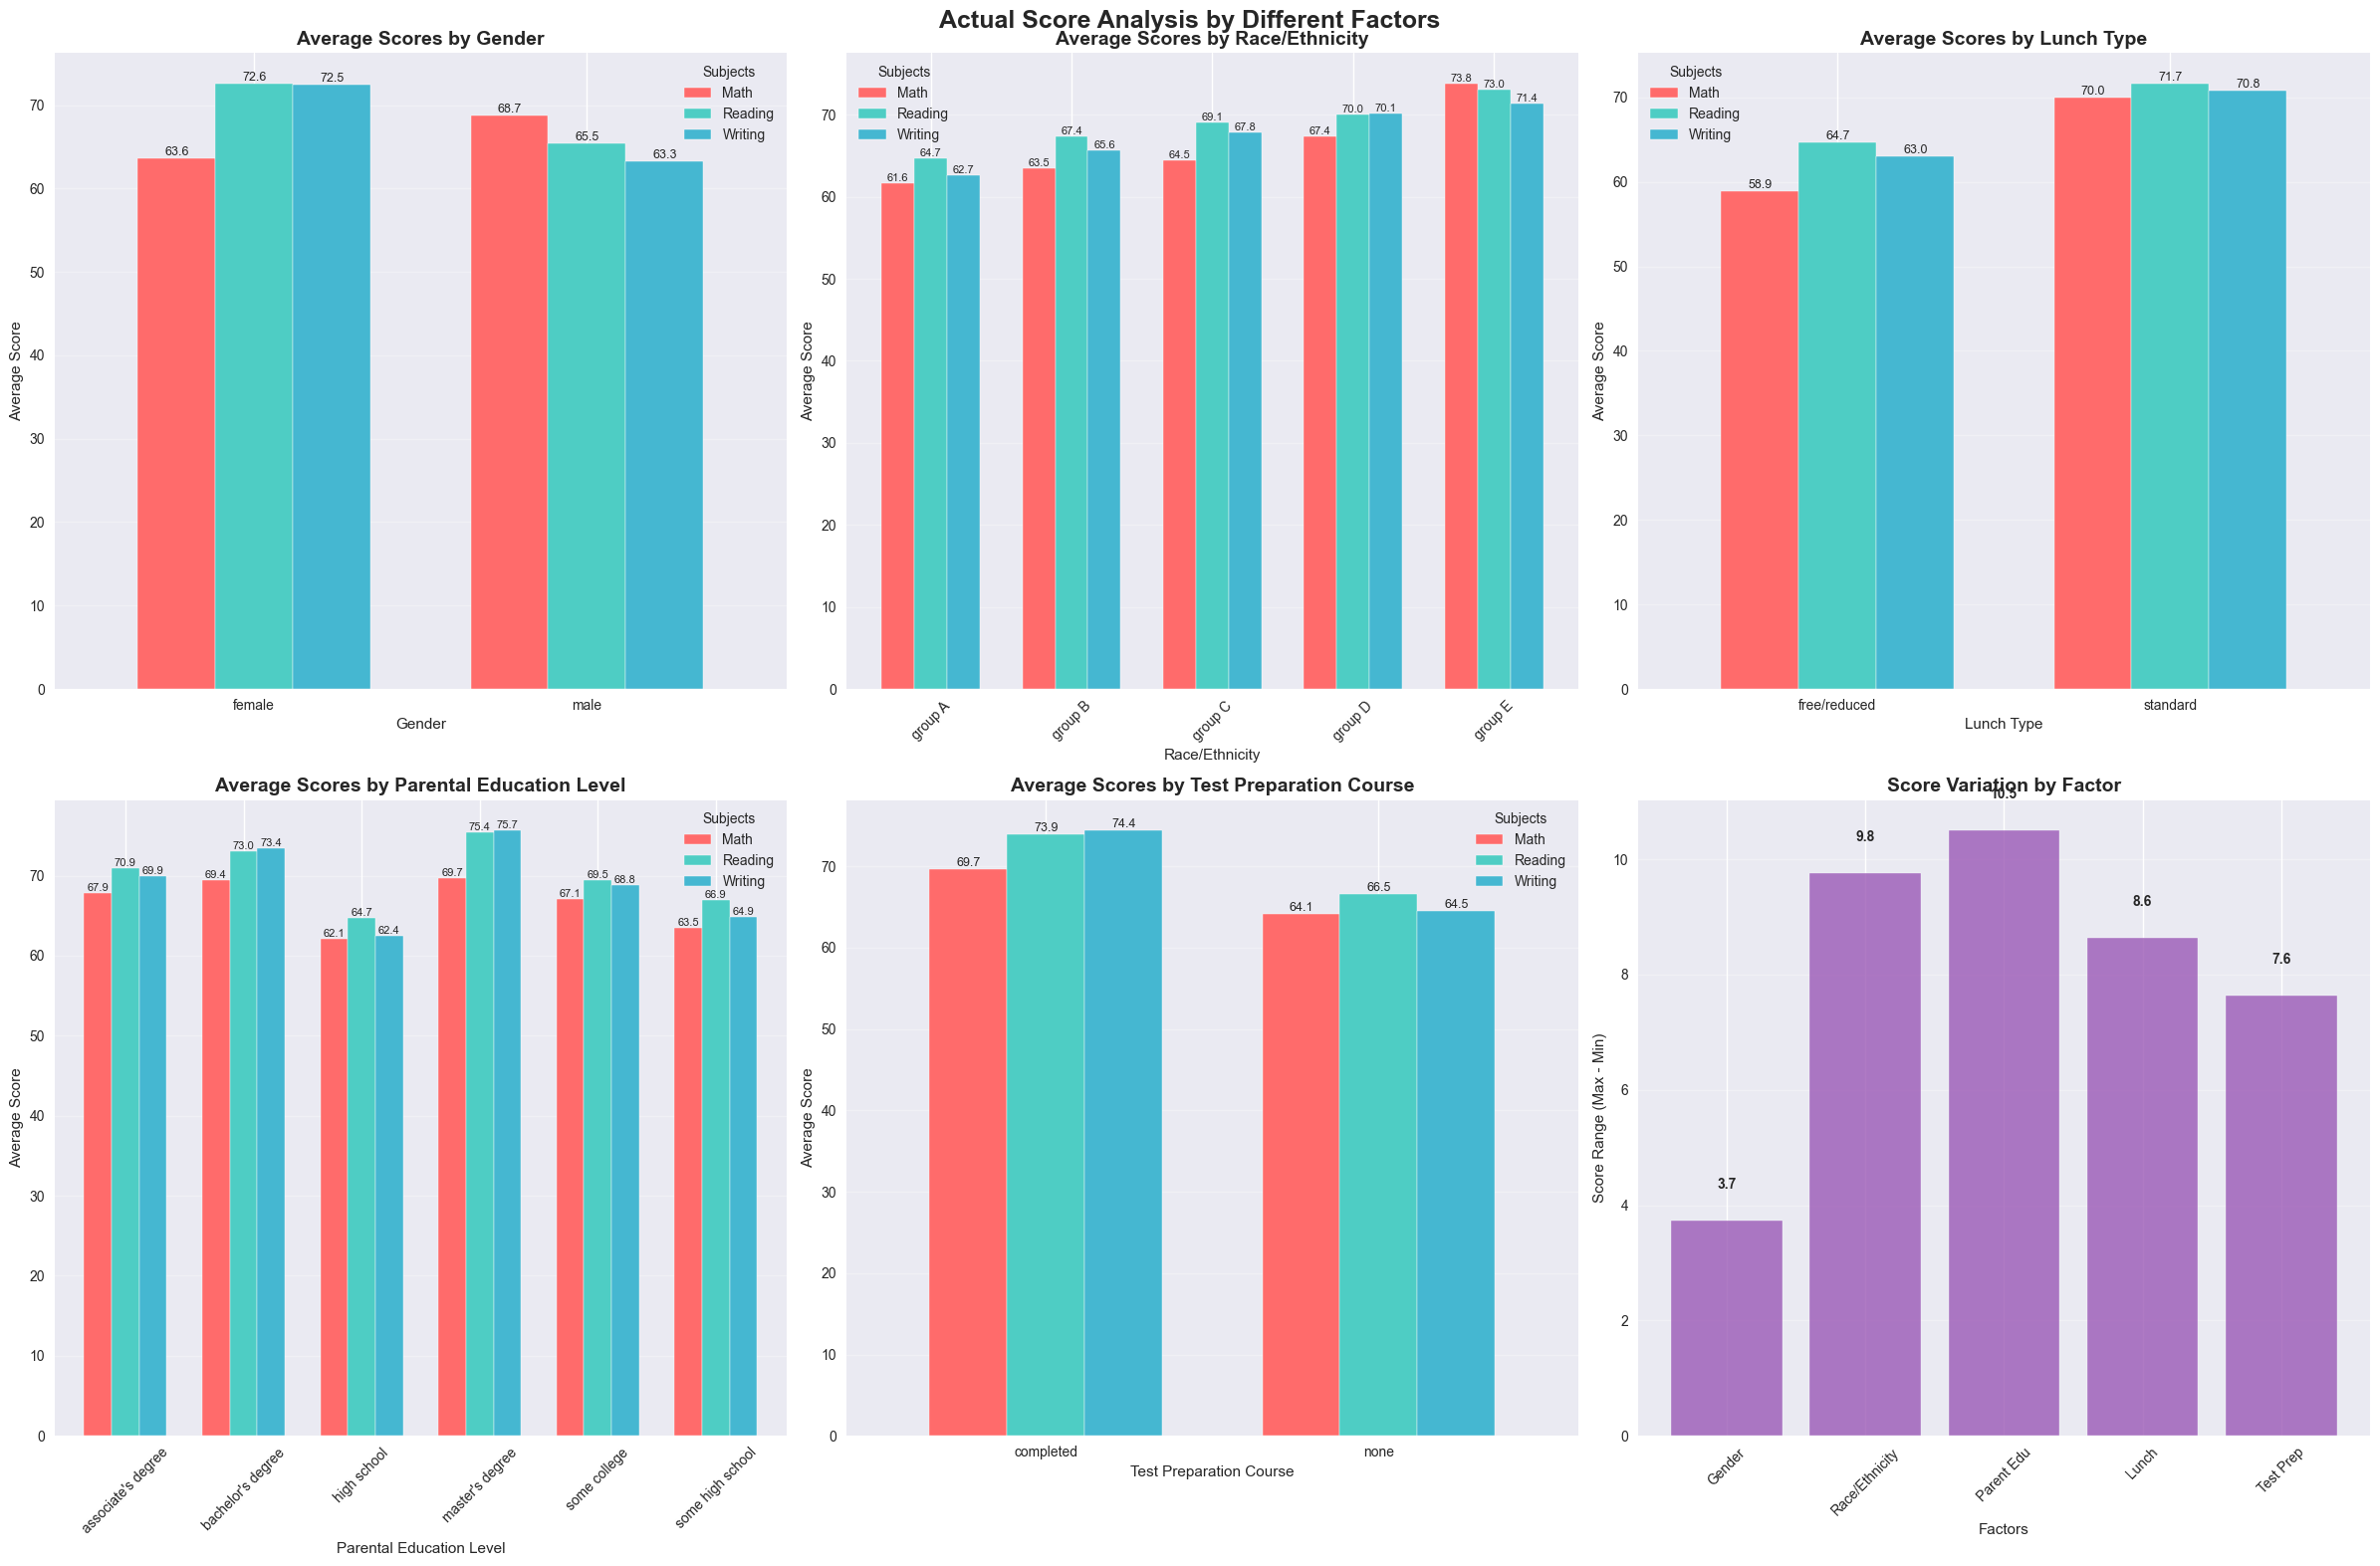

In [72]:
print("Biểu đồ điểm thực tế")
# lấy điểm thực
actual_score_cols = [ 'math score', 'reading score', 'writing score' ]
create_score_visualization(data, actual_score_cols, "Actual ")

Biểu đồ sau dự đoán


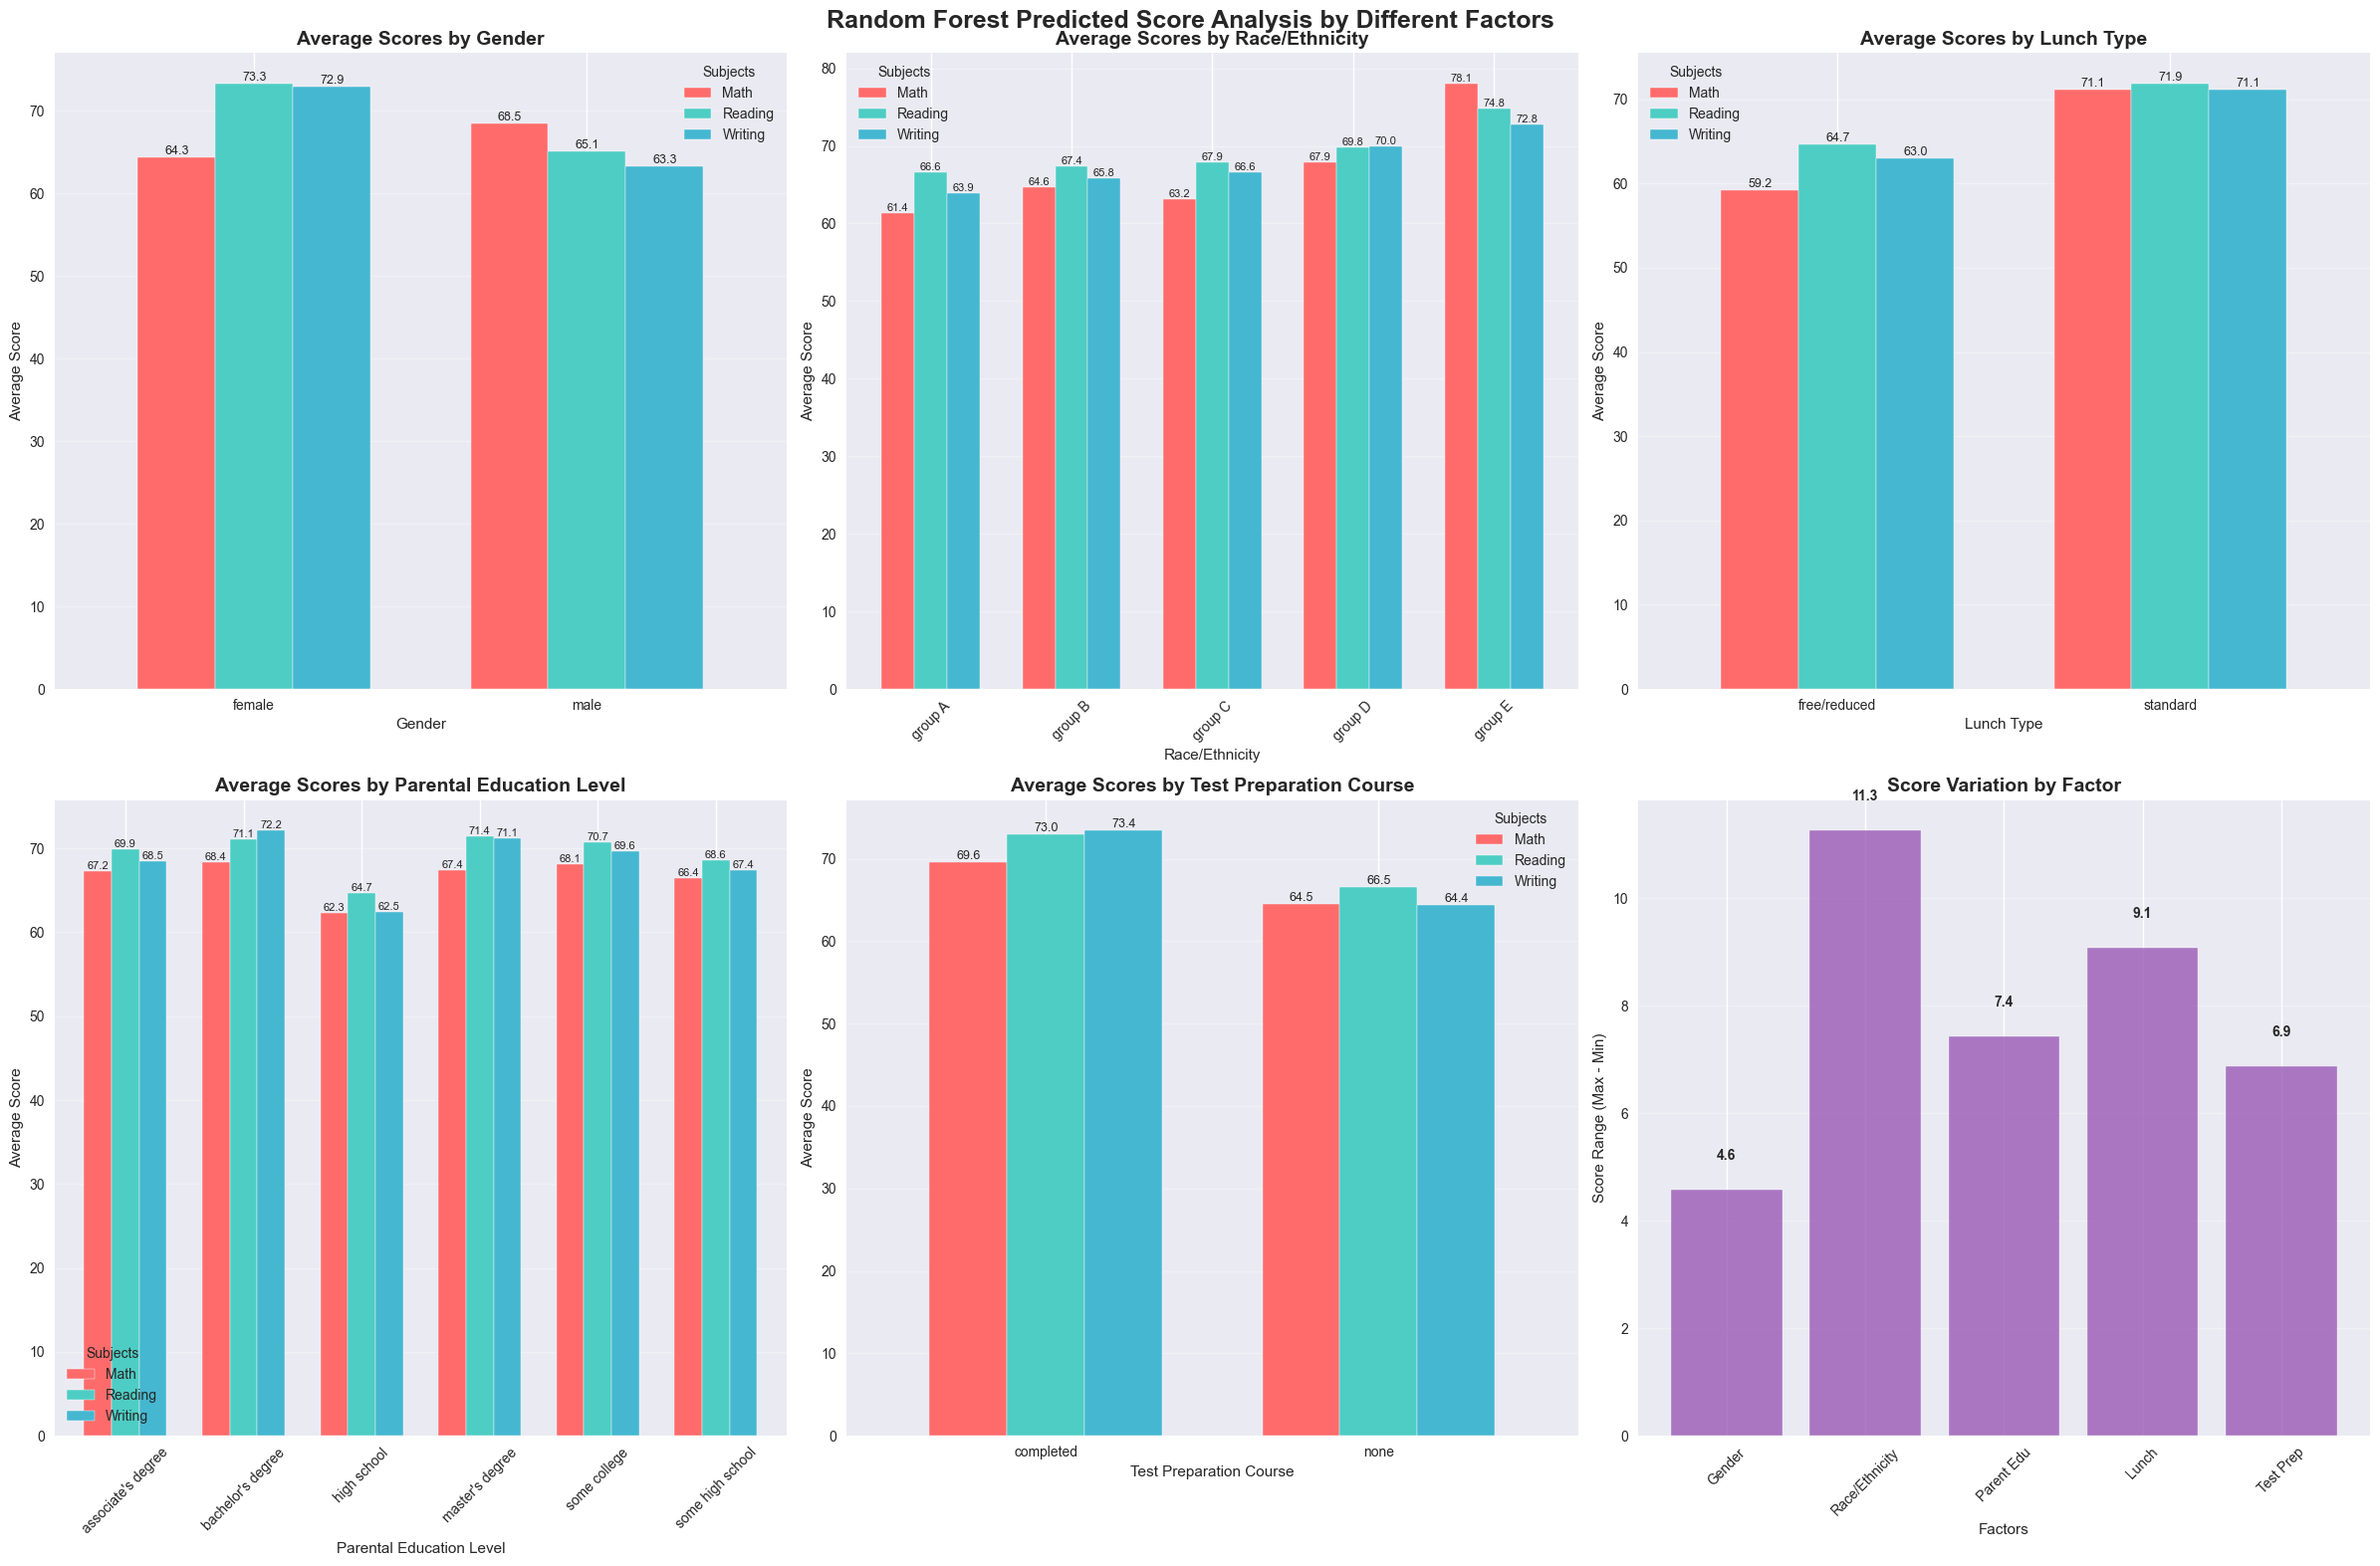

In [73]:
print("Biểu đồ sau dự đoán")

# dự đoán từ Random Forest
rf_score_cols = [ 'math_pred_rf', 'reading_pred_rf', 'writing_pred_rf' ]
create_score_visualization(results_df, rf_score_cols, "Random Forest Predicted ")

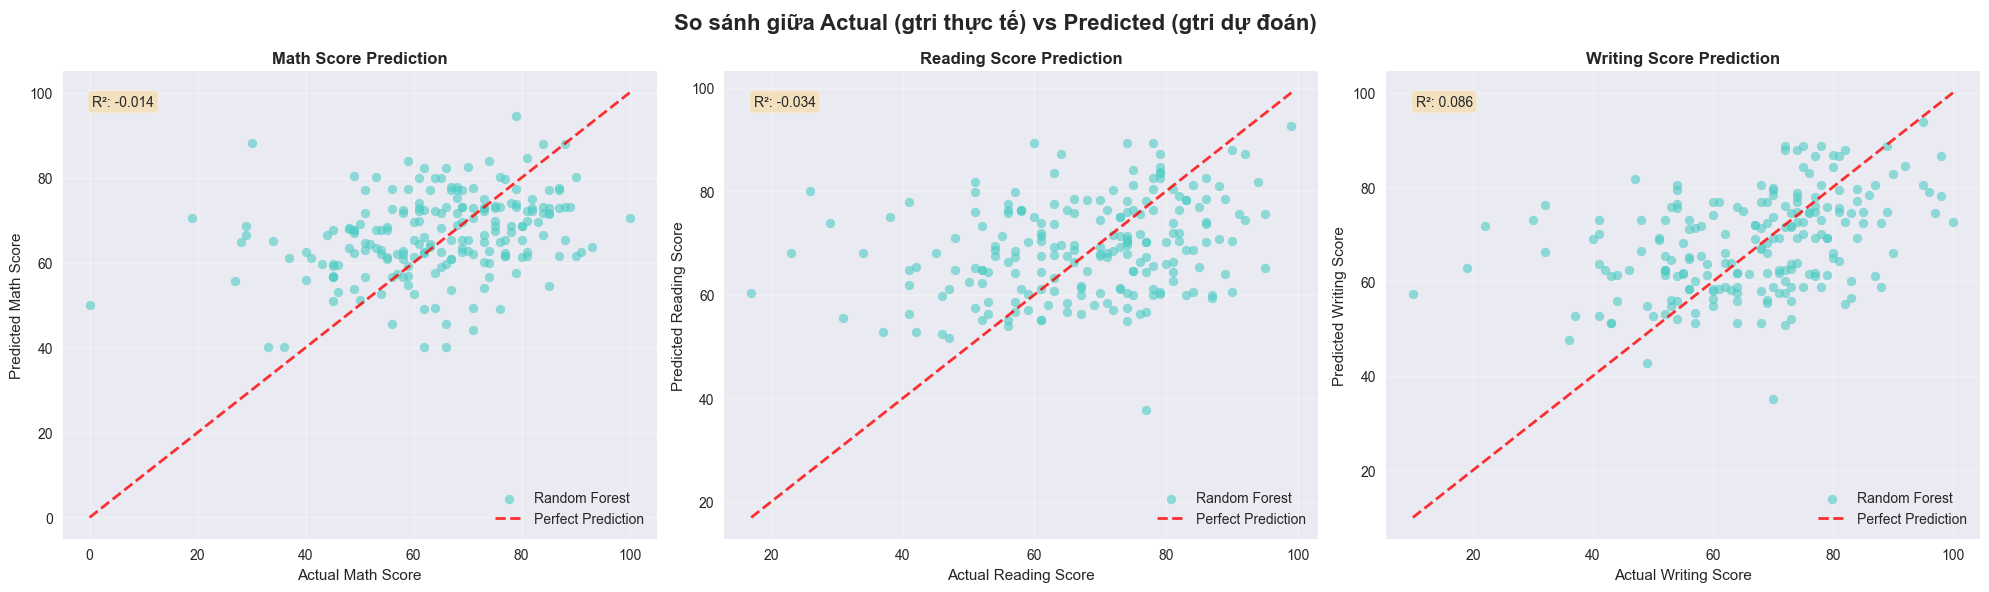

In [74]:
# so sanh
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('So sánh giữa Actual (gtri thực tế) vs Predicted (gtri dự đoán)', fontsize=16, fontweight='bold')

subjects = [ 'Math', 'Reading', 'Writing' ]
actual_scores = [ y_math_test, y_reading_test, y_writing_test ]
rf_predictions = [ rf_math_pred, rf_reading_pred, rf_writing_pred ]

for i, (subject, actual, rf_pred) in enumerate(zip(subjects, actual_scores, rf_predictions)):
    ax = axes [ i ]
    # Scatter plot
    ax.scatter(actual, rf_pred, alpha=0.6, label='Random Forest', s=40, color='#4ECDC4')
    # Perfect prediction line
    min_score = min(actual.min(), rf_pred.min())
    max_score = max(actual.max(), rf_pred.max())
    ax.plot([ min_score, max_score ], [ min_score, max_score ], 'r--', alpha=0.8,
            label='Perfect Prediction', linewidth=2)
    ax.set_xlabel(f'Actual {subject} Score')
    ax.set_ylabel(f'Predicted {subject} Score')
    ax.set_title(f'{subject} Score Prediction', fontweight='bold')
    ax.legend()
    ax.grid(alpha=0.3)
    # R² score
    r2_rf = r2_score(actual, rf_pred)
    ax.text(0.05, 0.95, f'R²: {r2_rf:.3f}',
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

mức quan trọng của feature tới các điểm


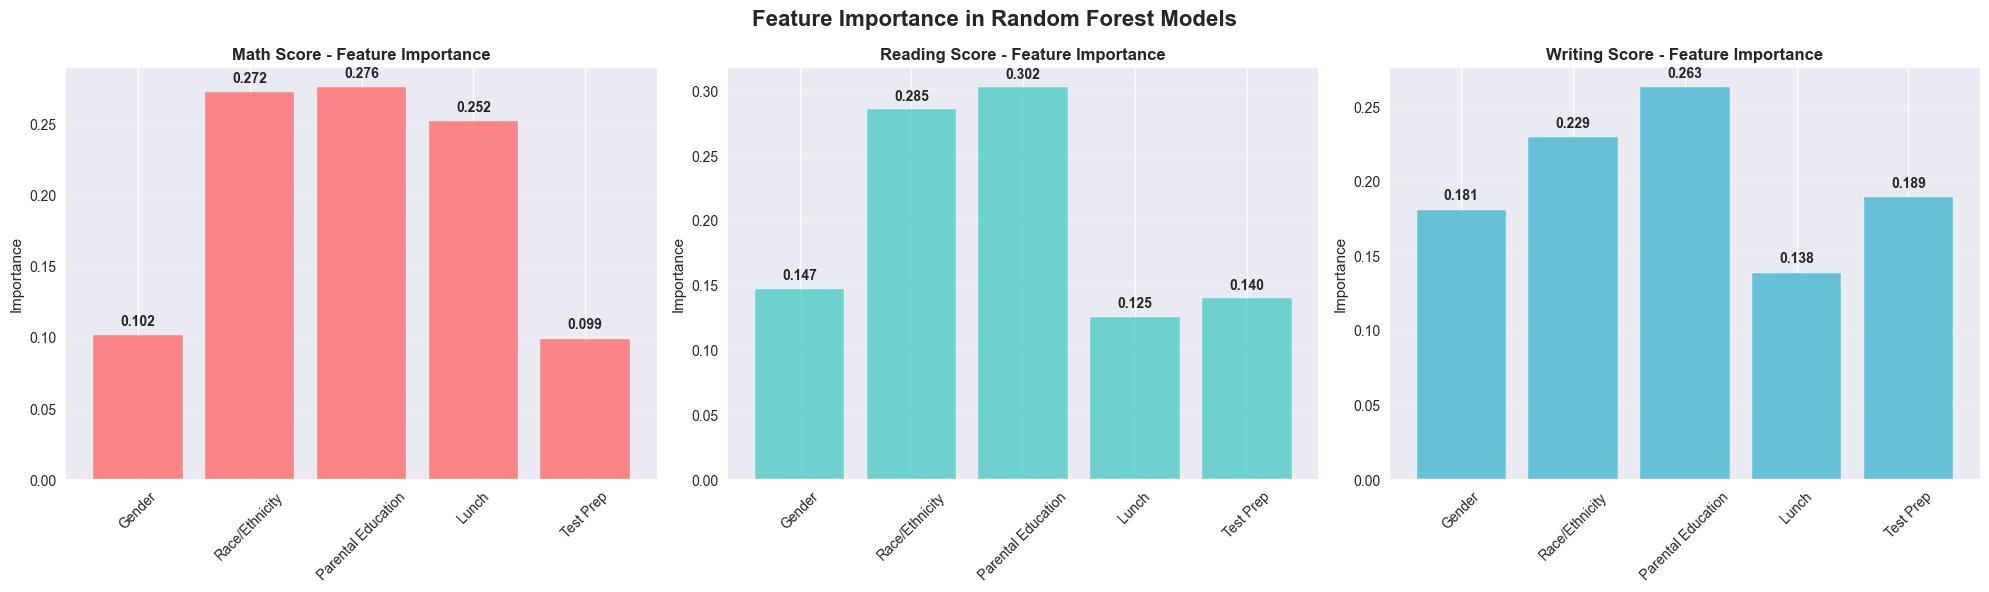

,Feature,Math_Importance,Reading_Importance,Writing_Importance,Average_Importance
2,Parental Education,0.27559,0.30245,0.26271,0.28025
1,Race/Ethnicity,0.27211,0.28533,0.22923,0.26223
3,Lunch,0.25190,0.12537,0.13849,0.17192
0,Gender,0.10155,0.14708,0.18069,0.14311
4,Test Prep,0.09884,0.13977,0.18888,0.14250


In [79]:
print("mức quan trọng của feature tới các điểm")
feature_names = [ 'Gender', 'Race/Ethnicity', 'Parental Education', 'Lunch', 'Test Prep' ]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Feature Importance in Random Forest Models', fontsize=16, fontweight='bold')

rf_models = [ rf_math, rf_reading, rf_writing ]
subjects = [ 'Math', 'Reading', 'Writing' ]
colors = [ '#FF6B6B', '#4ECDC4', '#45B7D1' ]

for i, (model, subject, color) in enumerate(zip(rf_models, subjects, colors)):
    ax = axes [ i ]
    importances = model.feature_importances_

    bars = ax.bar(feature_names, importances, color=color, alpha=0.8)
    ax.set_title(f'{subject} Score - Feature Importance', fontweight='bold')
    ax.set_ylabel('Importance')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)

    # Thêm giá trị lên bar
    for bar, importance in zip(bars, importances):
        ax.text(bar.get_x() + bar.get_width() / 2., bar.get_height() + 0.005,
                f'{importance:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# feature imp table
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Math_Importance': rf_math.feature_importances_,
    'Reading_Importance': rf_reading.feature_importances_,
    'Writing_Importance': rf_writing.feature_importances_
})
importance_df [ 'Average_Importance' ] = importance_df [
    [ 'Math_Importance', 'Reading_Importance', 'Writing_Importance' ] ].mean(axis=1)
importance_df = importance_df.sort_values('Average_Importance', ascending=False)
importance_df.round(5)


In [82]:
# Tổng kết
print(f"\n Kết quả RF:")
rf_avg_r2 = (rf_math_metrics [ 'R2' ] + rf_reading_metrics [ 'R2' ] + rf_writing_metrics [ 'R2' ]) / 3
rf_avg_rmse = (rf_math_metrics [ 'RMSE' ] + rf_reading_metrics [ 'RMSE' ] + rf_writing_metrics [ 'RMSE' ]) / 3
print(f"   • Math - R²: {rf_math_metrics [ 'R2' ]:.3f}, RMSE: {rf_math_metrics [ 'RMSE' ]:.2f}")
print(f"   • Reading - R²: {rf_reading_metrics [ 'R2' ]:.3f}, RMSE: {rf_reading_metrics [ 'RMSE' ]:.2f}")
print(f"   • Writing - R²: {rf_writing_metrics [ 'R2' ]:.3f}, RMSE: {rf_writing_metrics [ 'RMSE' ]:.2f}")
print(f"   • Average R²: {rf_avg_r2:.3f}, Average RMSE: {rf_avg_rmse:.2f}")

print(f"\n Feature rank:")
for idx, row in importance_df.iterrows():
    print(f"   {idx + 1}. {row [ 'Feature' ]}: {row [ 'Average_Importance' ]:.3f}")

most_important_feature = importance_df.iloc [ 0 ] [ 'Feature' ]
print(f"    =>Feature quan trọng nhất: {most_important_feature}")

print(f"\n Hiệu suất của mô hình:")
prediction_accuracy = rf_avg_r2 * 100
print(f"   • Độ chính xác pred: {prediction_accuracy:.1f}%")
print(f"   • Sai số trung bình: ±{rf_avg_rmse:.1f} điểm")


 Kết quả RF:
   • Math - R²: -0.014, RMSE: 15.71
   • Reading - R²: -0.034, RMSE: 15.29
   • Writing - R²: 0.086, RMSE: 14.85
   • Average R²: 0.013, Average RMSE: 15.28

 Feature rank:
   3. Parental Education: 0.280
   2. Race/Ethnicity: 0.262
   4. Lunch: 0.172
   1. Gender: 0.143
   5. Test Prep: 0.142
    =>Feature quan trọng nhất: Parental Education

 Hiệu suất của mô hình:
   • Độ chính xác pred: 1.3%
   • Sai số trung bình: ±15.3 điểm
